### Exemple pratique utilisant segyio (https://github.com/equinor/segyio)

In [1]:
import segyio
import matplotlib.pyplot as plt
seismic_path = '/Users/lua/wild/press_review/f3_seismic.sgy'
labels_path = '/Users/lua/wild/press_review/f3_labels.sgy'


In [7]:
with segyio.open(seismic_path) as seismic_file, segyio.open(labels_path) as labels_file:
    seismic_section = seismic_file.iline[600]
    labels_section = labels_file.iline[600]

seismic_section.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [3]:
labels_section.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

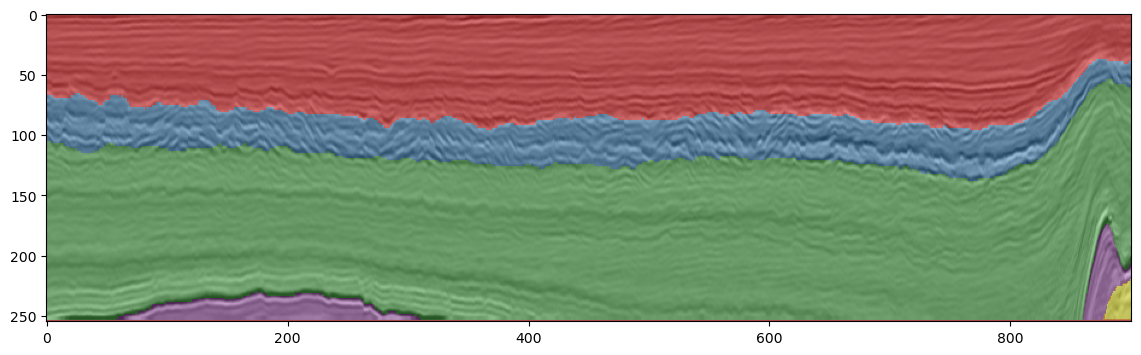

In [8]:
fig, ax = plt.subplots(figsize=(14, 5))
ax.imshow(seismic_section.T, vmin=-1.0, vmax=1.0, cmap="gray")
ax.imshow(labels_section.T, vmin=-0.5, vmax=8.5, alpha=0.5, cmap="Set1")
plt.show()

In [9]:
import segyio
import numpy as np
from mayavi import mlab


# Read a range of inlines from the seismic dataset into a 3D numpy array
with segyio.open(seismic_path, "r") as seismic_file:
    # Define the range of inlines you are interested in
    inlines_start = 100
    inlines_end = 700
    inlines_range = range(inlines_start, inlines_end)
    seismic_data = np.stack([seismic_file.iline[i] for i in inlines_range])

# Normalize the data for better visualization
seismic_data_normalized = (seismic_data - np.min(seismic_data)) / (np.max(seismic_data) - np.min(seismic_data))

# Create a figure
fig = mlab.figure(size=(800, 800), bgcolor=(0, 0, 0))

# Visualize the seismic data using volume rendering
vol = mlab.pipeline.volume(mlab.pipeline.scalar_field(seismic_data_normalized), vmin=0, vmax=1)

# Enhancing the contrast of visualization
vol.module_manager.scalar_lut_manager.lut.table_range = [0.1, 0.9]

# Adding axes
mlab.axes(xlabel='Inline', ylabel='Crossline', zlabel='Depth')

# Adding orientation axes
mlab.orientation_axes()

mlab.show()


qt.qpa.window: <QNSWindow: 0x7fd16e3e22b0; contentView=<QNSView: 0x7fd17019d7c0; QCocoaWindow(0x7fd17019d6b0, window=QWidgetWindow(0x7fd17019d3a0, name="QMainWindowClassWindow"))>> has active key-value observers (KVO)! These will stop working now that the window is recreated, and will result in exceptions when the observers are removed. Break in QCocoaWindow::recreateWindowIfNeeded to debug.
